1. Import necessary libraries and load the dataset.
2. Identify the target variable (the variable you want to predict) and predictors (the variables used to predict the target).
3. Perform basic data exploration, such as checking the number of rows and columns, data types, and summary statistics.
4. We shall remove any columns that are deemed useless or irrelevant for the analysis. We shall ensure to remove duplicates and missing values as well.
5. Conduct visual exploratory data analysis (EDA) to understand the data distribution. This shal involve creating histograms and bar charts to examine the distribution of the target variable and predictors.
6. Perform feature selection based on the data distribution. Identify predictors that show significant variations or relationships with the target variable.
7. Address any outliers in the dataset. You can choose to remove outliers, transform the data, or handle them in a way that aligns with the specific requirements of your problem.
8. Handle missing values in the dataset. Depending on the extent of missing data, you can either remove the corresponding rows or impute values using techniques like mean, median, or advanced imputation methods.
9. Conduct visual correlation analysis to understand the relationships between predictors and the target variable. This can involve scatter plots, heatmaps, or other visualizations.
10. Perform statistical correlation analysis, such as calculating correlation coefficients, to quantitatively measure the relationships between predictors and the target variable. Use these results to further refine the feature selection process.
11. Convert non-numeric data into numeric format suitable for machine learning algorithms. This may involve encoding categorical variables using techniques like one-hot encoding or label encoding.
12. Split the dataset into training and testing sets, and implement sampling techniques if required. Use k-fold cross-validation to evaluate the performance of the models.
13. Try multiple classification algorithms and train them on the training dataset. Evaluate their performance using appropriate metrics and cross-validation results.
14. Select the best-performing model based on evaluation metrics, such as accuracy, precision, recall, or F1-score.
15. Fine-tune the selected model by adjusting hyperparameters using techniques like grid search or random search.
as instructions to follow

#### Defining the problem statement

We shall create a machine learning model that can predict the price of a diamond. This model will take into account various features of the diamond, such as carat, cut, color, clarity, depth, table, length, width, and depth. By inputting these features into the model, I expect to receive a predicted price for the diamond. The model will be trained using a test dataset diamond prices and corresponding feature values. The goal is to develop a reliable and accurate prediction model that can assist in estimating the price of diamonds based on their characteristics.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### Reading the data in python

In [ ]:
diamond_data = pd.read_excel('DiamondPricesData.xlsx')
diamond_data.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


### Exploring the data

In [ ]:
diamond_data.shape

(53940, 10)

In [ ]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
diamond_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,53940.0,NaN,NaN,NaN,3932.799722,3989.439738,326.0,950.0,2401.0,5324.25,18823.0
carat,53940.0,NaN,NaN,NaN,0.79794,0.474011,0.2,0.4,0.7,1.04,5.01
cut,53940,5,Ideal,21551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,53934,7,G,11286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,53940,8,SI1,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,53926.0,NaN,NaN,NaN,61.749479,1.432661,43.0,61.0,61.8,62.5,79.0
table,53940.0,NaN,NaN,NaN,57.457184,2.234491,43.0,56.0,57.0,59.0,95.0
x,53940.0,NaN,NaN,NaN,5.731157,1.121761,0.0,4.71,5.7,6.54,10.74
y,53940.0,NaN,NaN,NaN,5.734526,1.142135,0.0,4.72,5.71,6.54,58.9
z,53940.0,NaN,NaN,NaN,3.538734,0.705699,0.0,2.91,3.53,4.04,31.8


##### Finding Missing Values

In [ ]:
diamond_data.isnull().sum()


price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [ ]:
#Checking missing % rate(Showing us how the missing values affect our current dataset in percentages)
diamond_data.isnull().sum()/diamond_data.shape[0]*100

price      0.000000
carat      0.000000
cut        0.000000
color      0.011123
clarity    0.000000
depth      0.025955
table      0.000000
x          0.000000
y          0.000000
z          0.000000
dtype: float64

In [ ]:
#We shall drop the rows with missing information since they are small compared to our data set size
new_diamond = diamond_data.dropna()

In [ ]:
new_diamond.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
['cut', 'color', 'clarity','price', 'carat', 'depth', 'table', 'x', 'y', 'z']

['cut', 'color', 'clarity', 'price', 'carat', 'depth', 'table', 'x', 'y', 'z']

The code below creates a heatmap visualization of the missing values in the dataset using the seaborn library

<function matplotlib.pyplot.show(close=None, block=None)>

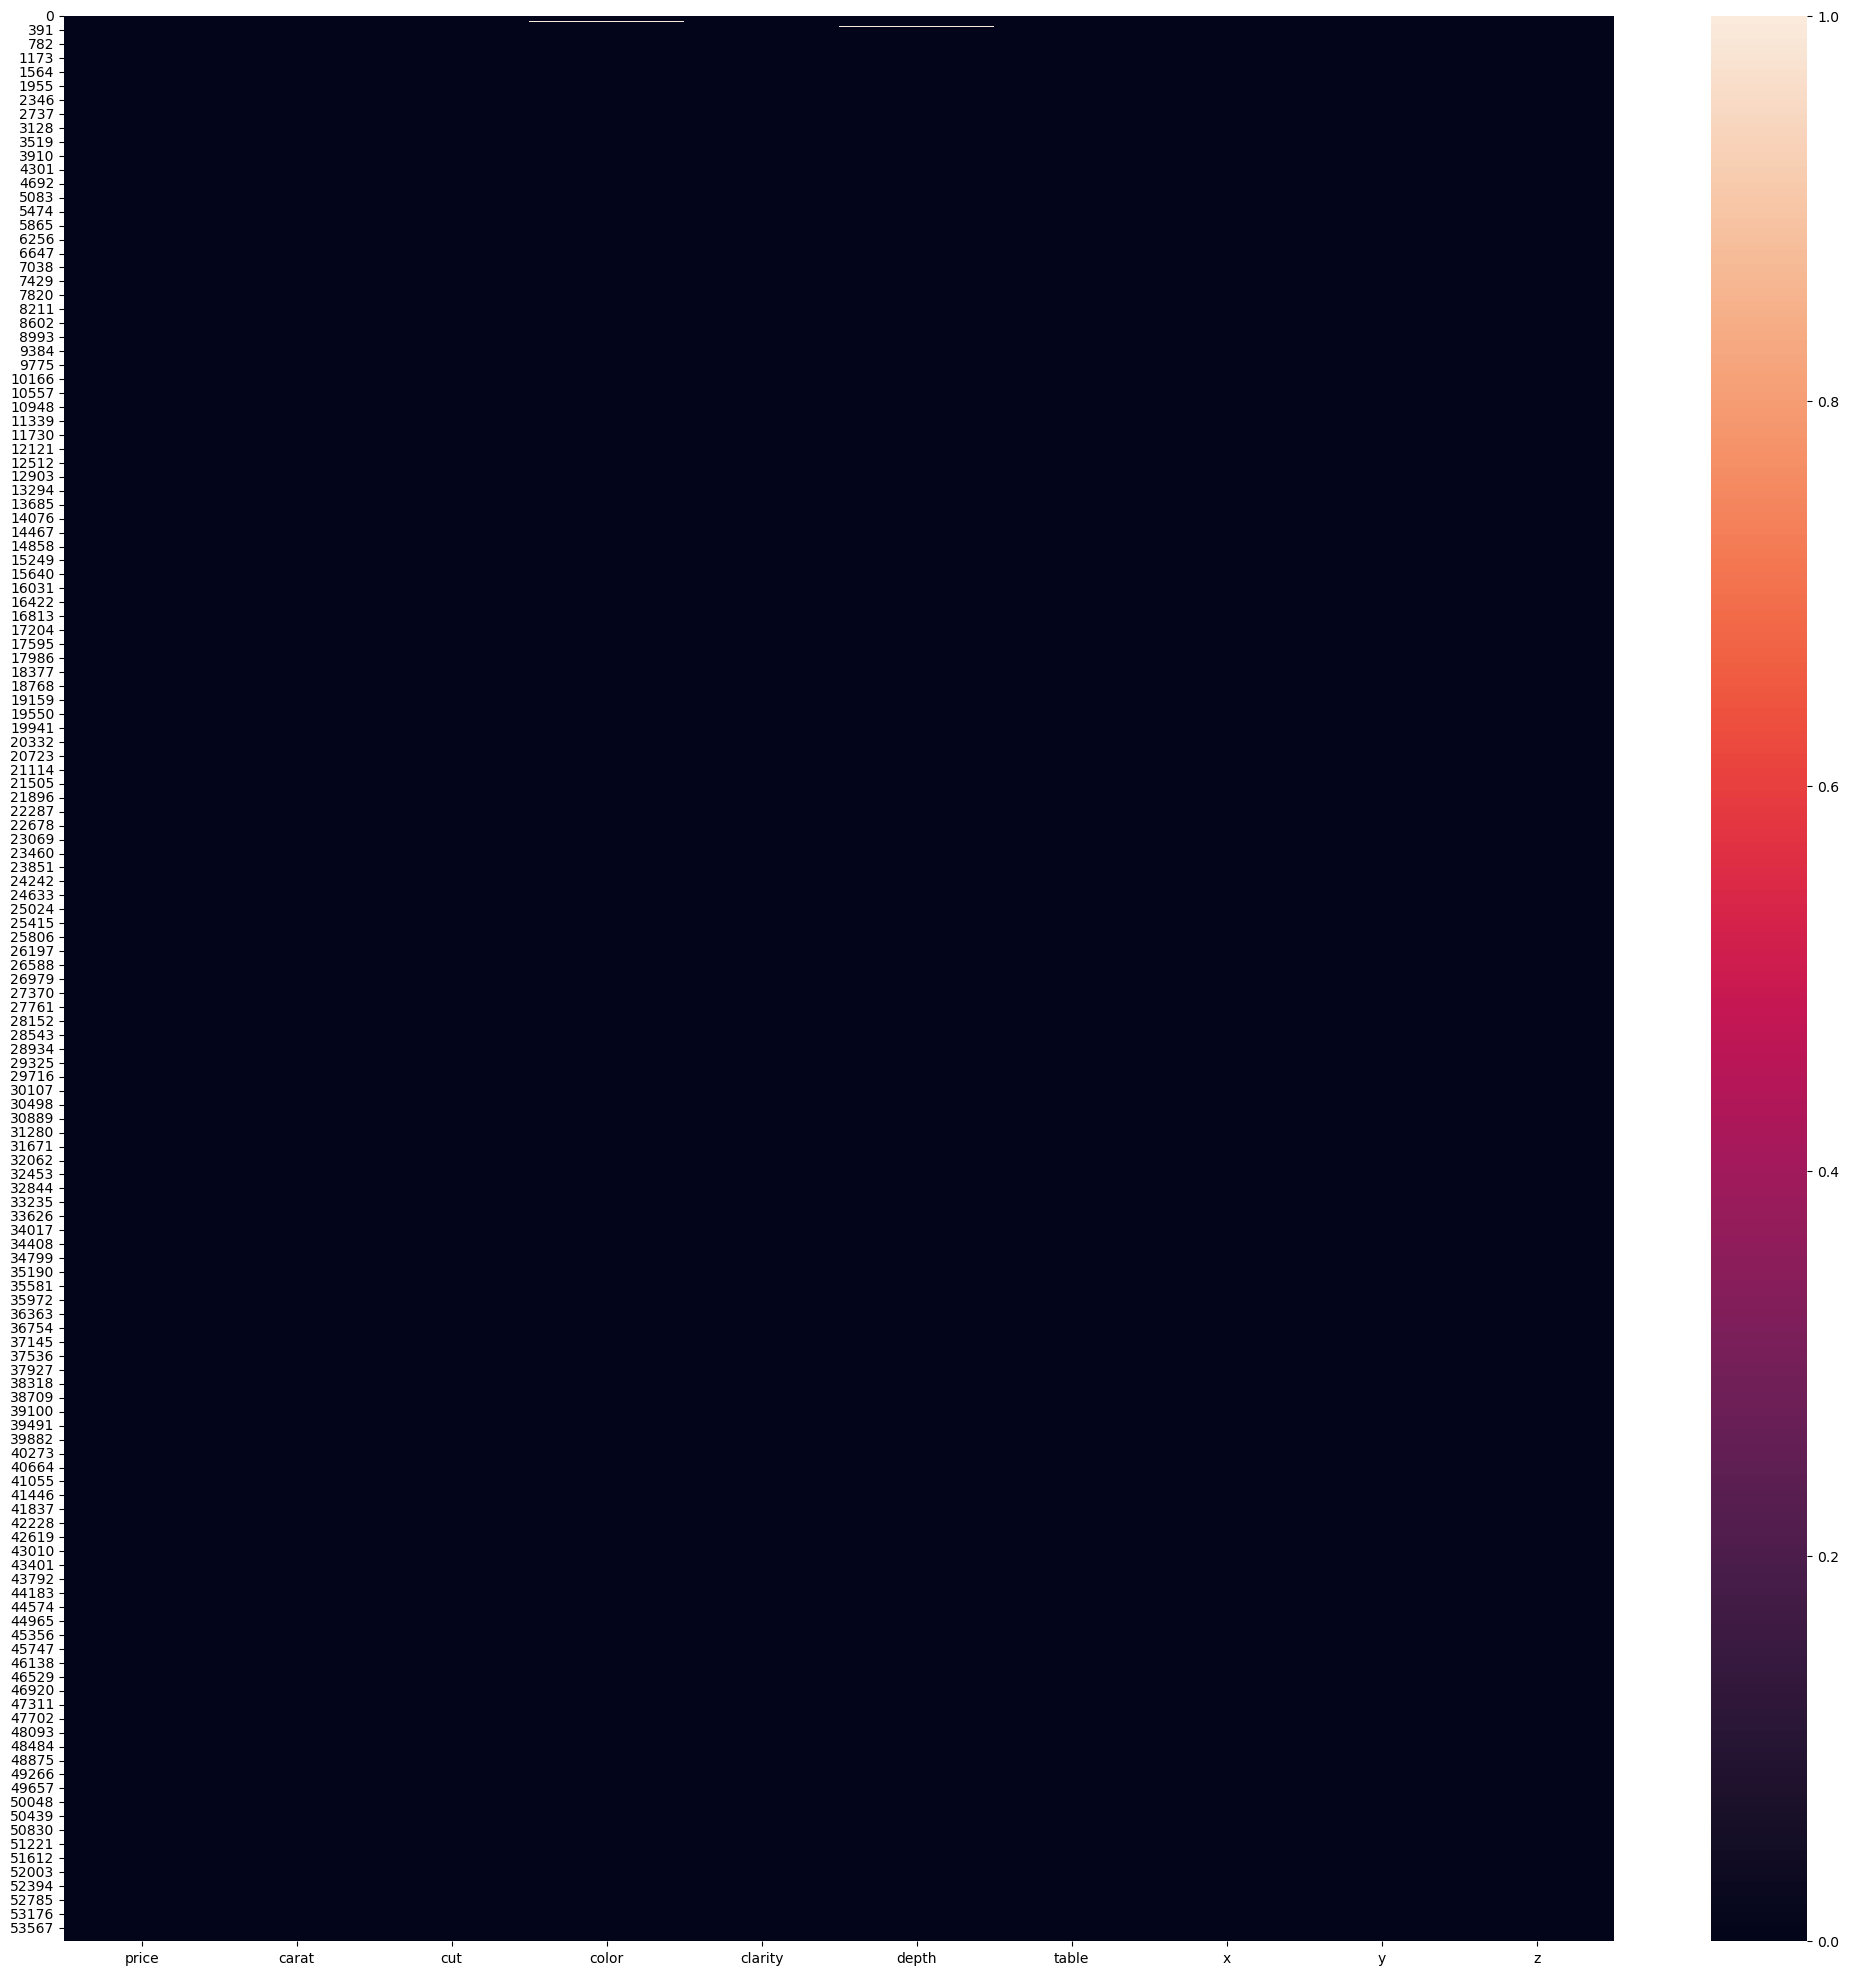

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(diamond_data.isnull())
plt.show

The below code create a visualization that shows a cleaner and more organized appearance

<function matplotlib.pyplot.show(close=None, block=None)>

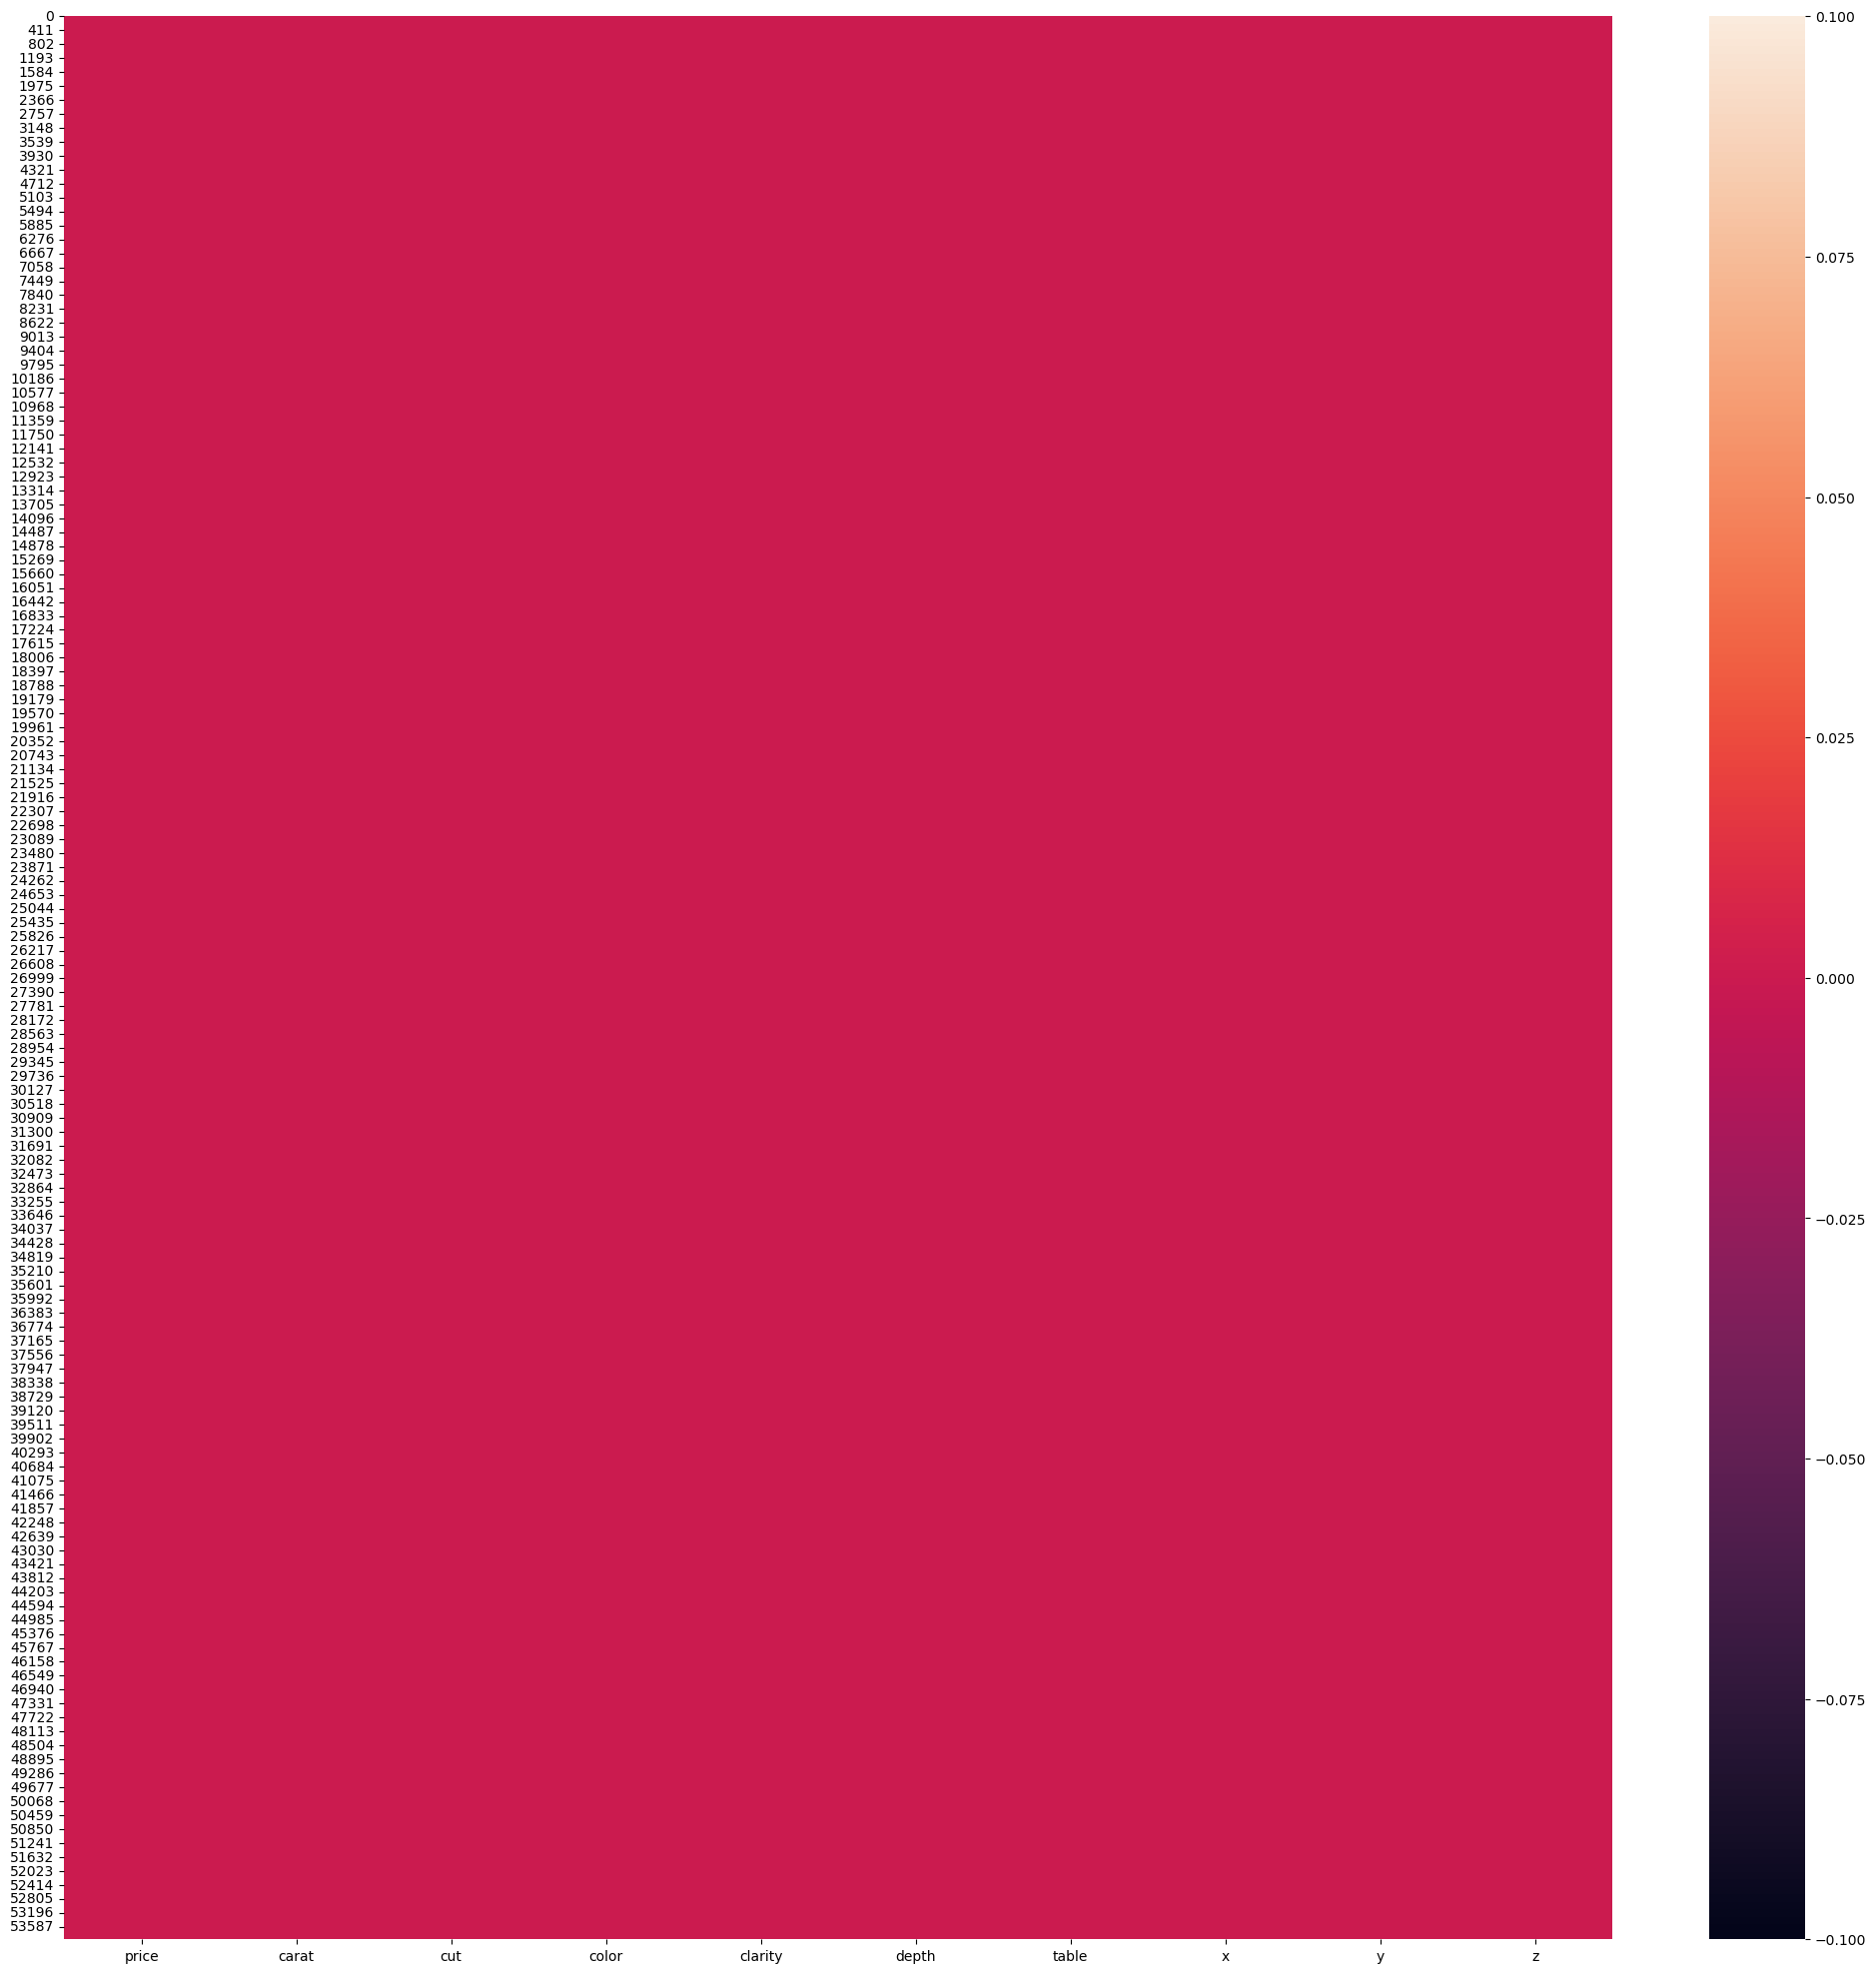

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(new_diamond.isnull())
plt.show

In [ ]:
# checking for duplicate vlaues in our dataset
New_diamond_duplicates = new_diamond.duplicated().sum()
New_diamond_duplicates

146

In [ ]:
# Remove any duplicate rows
Diamond_df = new_diamond.drop_duplicates()

In [ ]:
# Bar plots to look for outliers

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

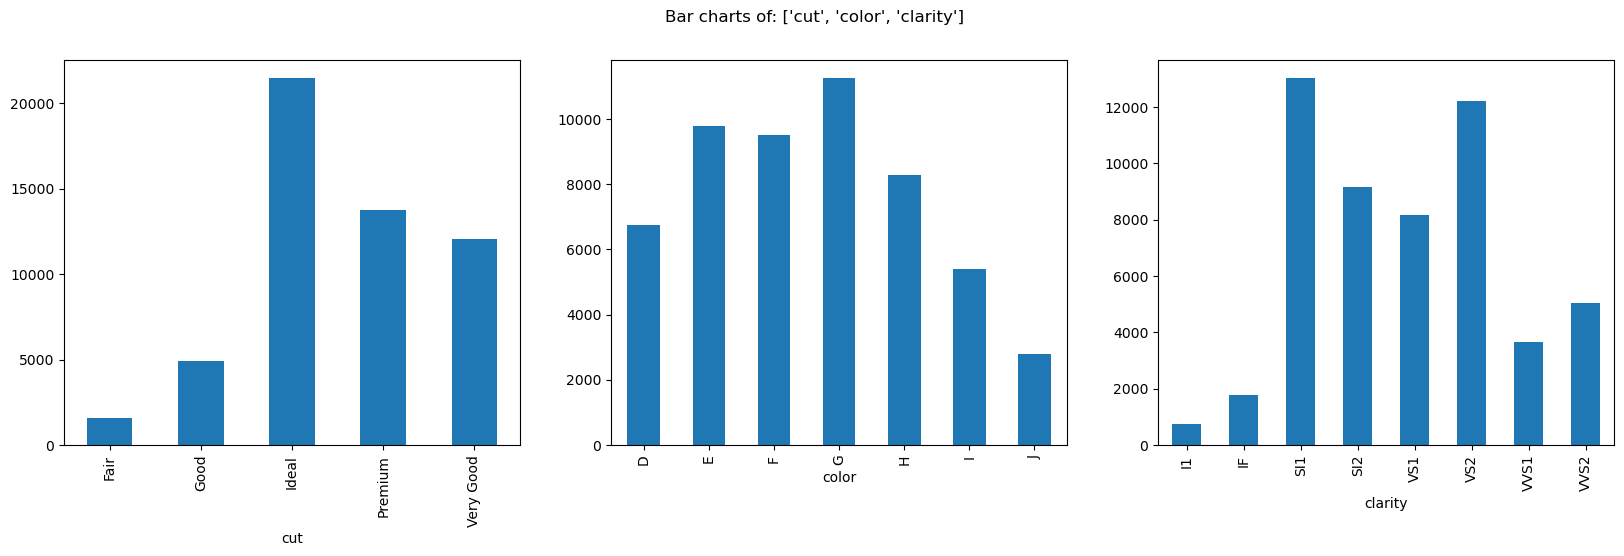

In [ ]:
# Using the function for categorical variables in Diamonds dataset
PlotBarCharts(inpData=Diamond_df, colsToPlot=['cut', 'color', 'clarity'])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

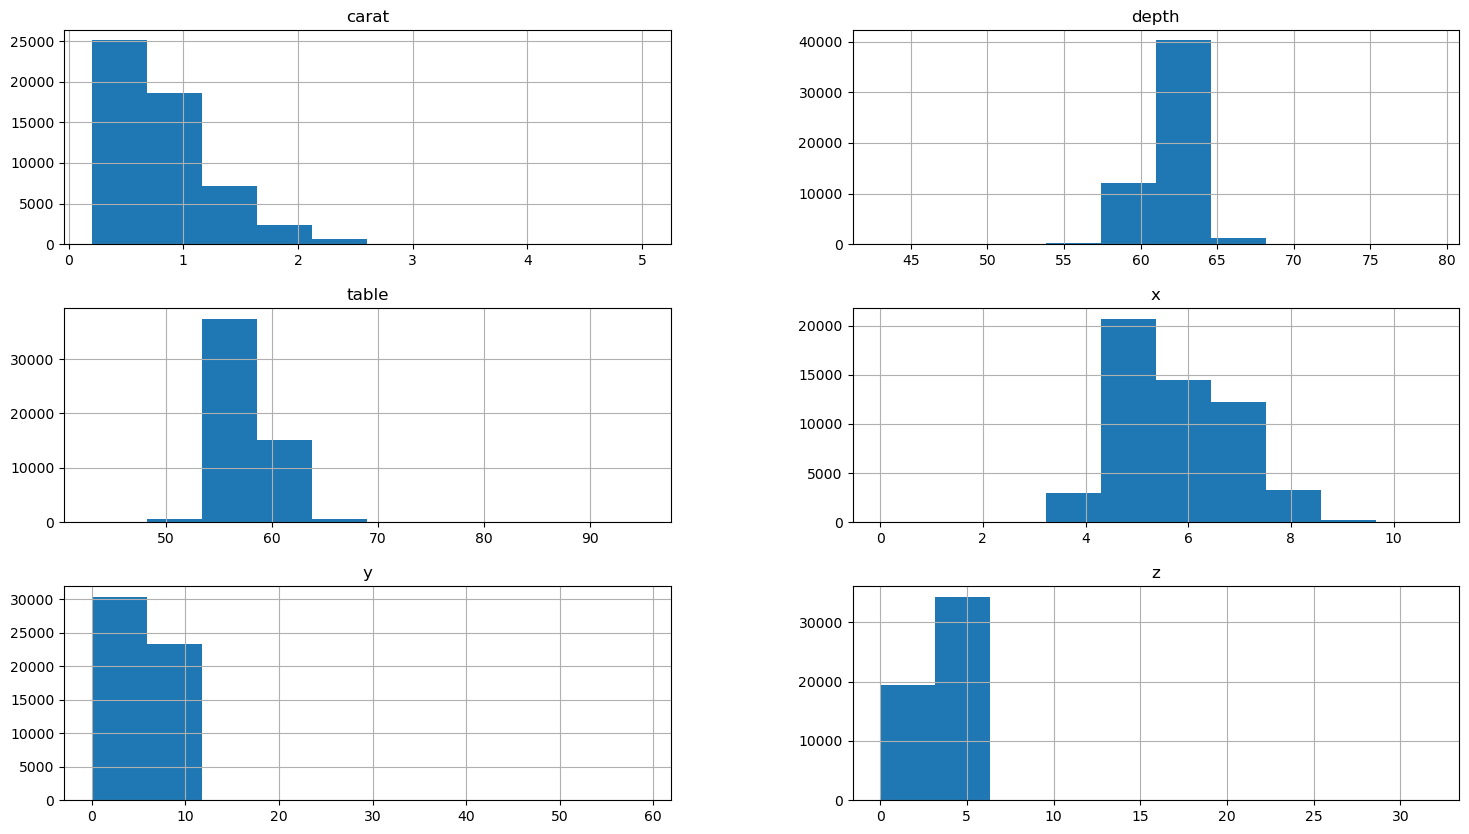

In [ ]:
# Plotting histograms of multiple columns together
Diamond_df.hist(['carat', 'depth', 'table', 'x','y','z'], figsize=(18,10))

In [ ]:

# Calculate the interquartile range (IQR) for each variable
variables = ['depth', 'table', 'x']
IQRs = {}
for var in variables:
    Q1 = Diamond_df[var].quantile(0.25)
    Q3 = Diamond_df[var].quantile(0.75)
    IQRs[var] = Q3 - Q1

# Define the lower and upper bounds for outlier detection for each variable
bounds = {}
for var in variables:
    lower_bound = Q1 - 1.5 * IQRs[var]
    upper_bound = Q3 + 1.5 * IQRs[var]
    bounds[var] = (lower_bound, upper_bound)

# Replace outliers with IQR for each variable
for var in variables:
    lower_bound, upper_bound = bounds[var]
    Diamond_df[f'{var}_without_outliers'] = np.where(
        (Diamond_df[var] < lower_bound) | (Diamond_df[var] > upper_bound),
        IQRs[var],
        Diamond_df[var]
    )


array([[<Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: >]], dtype=object)

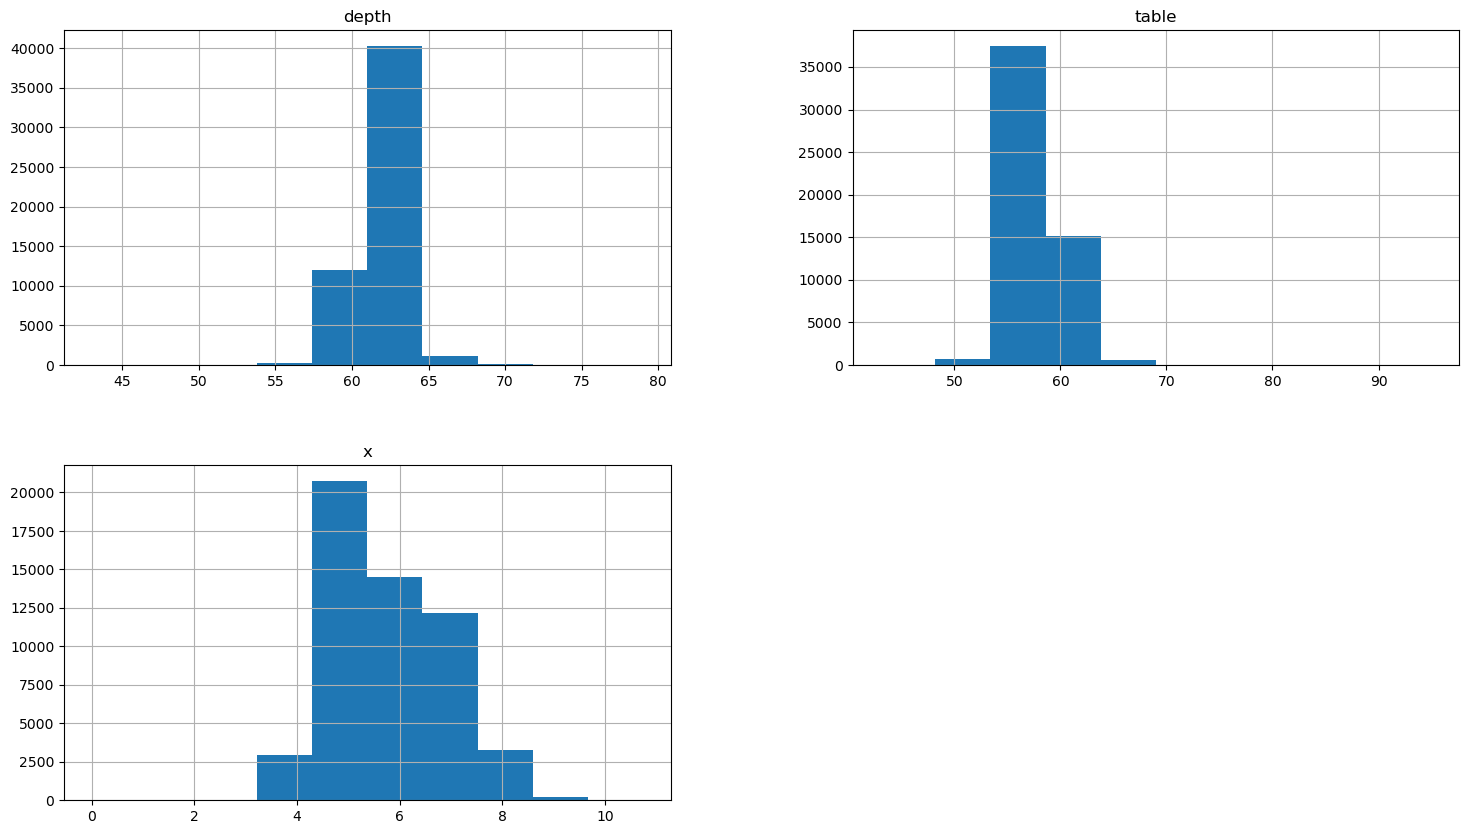

In [ ]:
# Plotting histograms to check if outliers have been dealt with
Diamond_df.hist(['depth', 'table', 'x'], figsize=(18,10))

In [ ]:
# Calculating correlation matrix for the continuous variables
ContinuousVariables=['price','carat', 'depth', 'table', 'x','y','z']

# Creating the correlation matrix
CorrelationData=Diamond_df[ContinuousVariables].corr()
CorrelationData

,price,carat,depth,table,x,y,z
price,1.000000,0.921547,-0.011075,0.126703,0.884529,0.865413,0.861219
carat,0.921547,1.000000,0.027886,0.181231,0.975390,0.951911,0.953543
depth,-0.011075,0.027886,1.000000,-0.297396,-0.025283,-0.029340,0.094792
table,0.126703,0.181231,-0.297396,1.000000,0.194982,0.183361,0.150438
x,0.884529,0.975390,-0.025283,0.194982,1.000000,0.974586,0.970684
y,0.865413,0.951911,-0.029340,0.183361,0.974586,1.000000,0.951835
z,0.861219,0.953543,0.094792,0.150438,0.970684,0.951835,1.000000


In [ ]:
#visiual display showing comparison between continous variables
import seaborn as sns
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

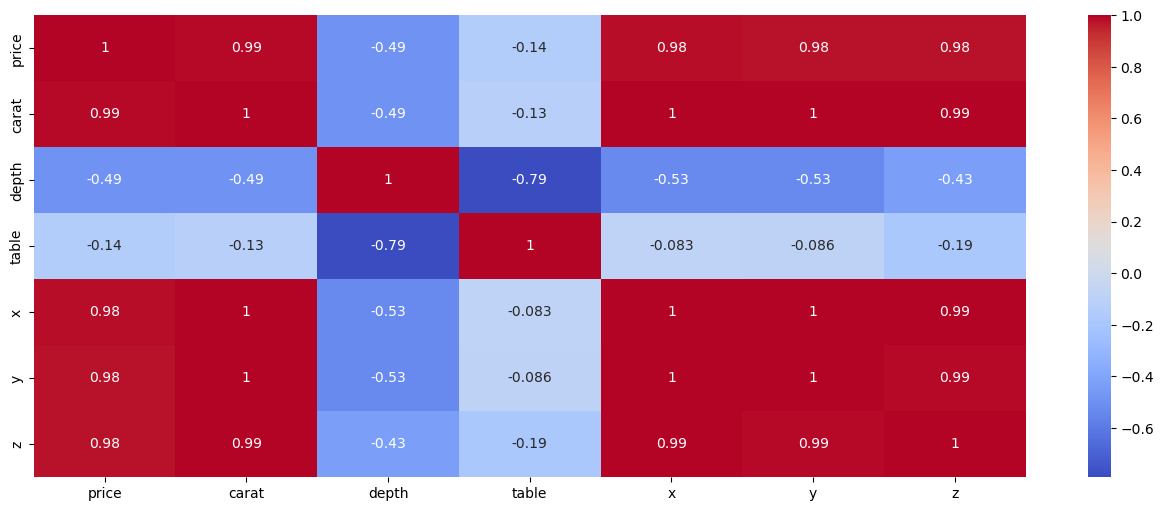

In [ ]:
#Plot the heatmap
plt.figure(figsize=(16,6))
sns.heatmap(CorrelationData.corr(), annot=True , cmap="coolwarm")
plt.show

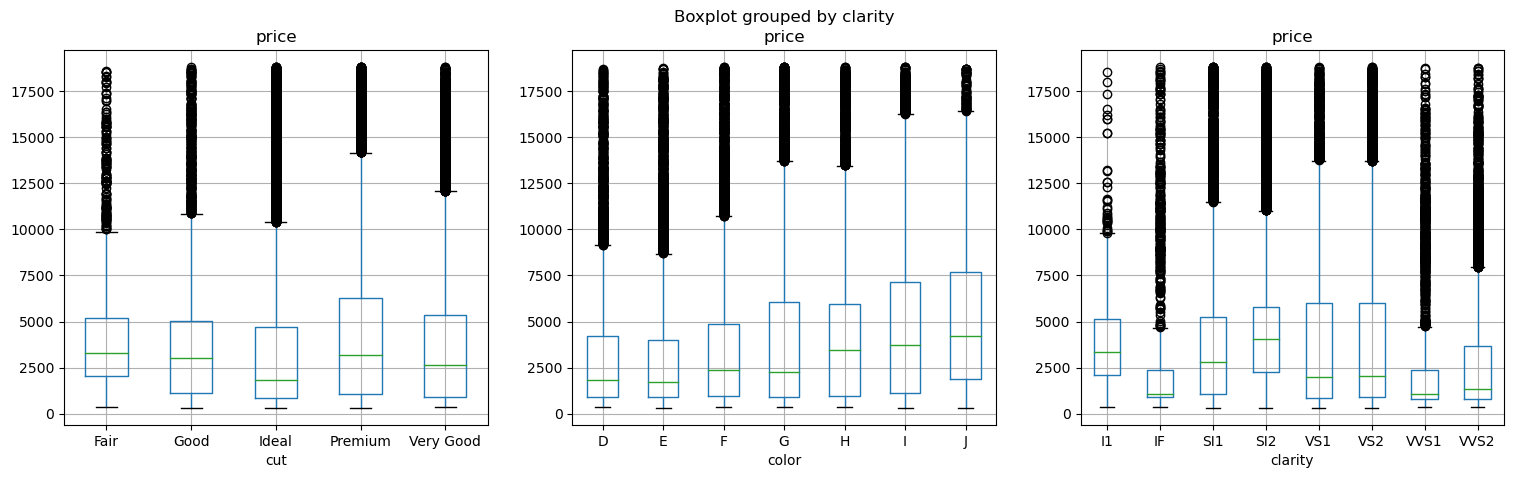

In [ ]:
#comparision between categorical and continous variables
CategoricalColsList=['cut', 'color', 'clarity']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Price"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Diamond_df.boxplot(column='price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

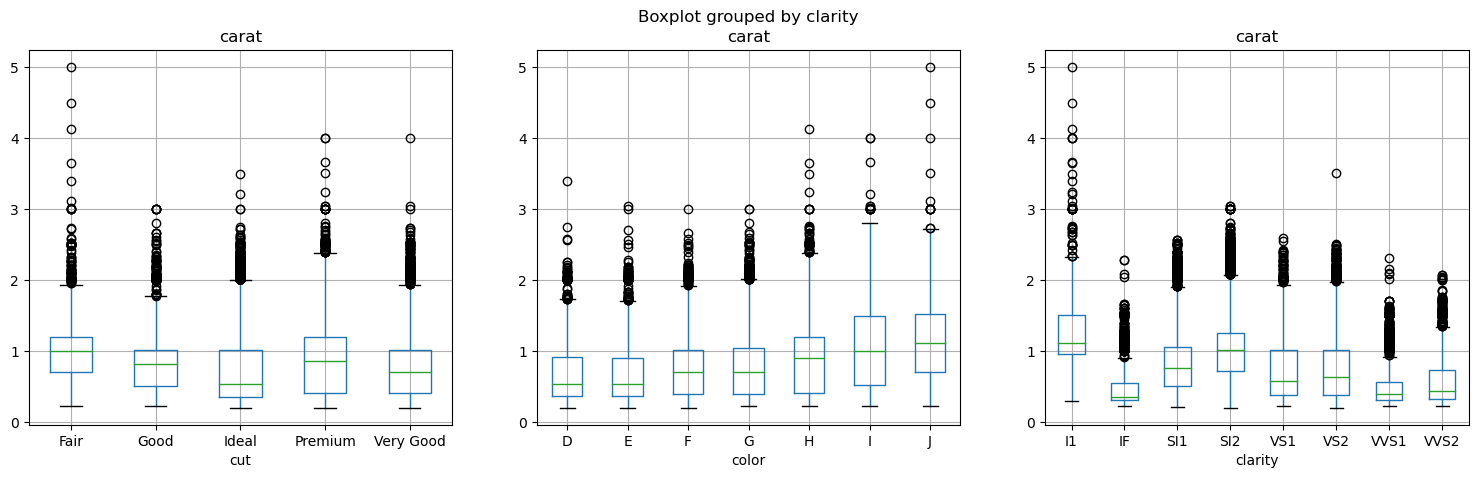

In [ ]:
#comparision between categorical and continous variables
CategoricalColsList=['cut', 'color', 'clarity']


import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "carat"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Diamond_df.boxplot(column='carat', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

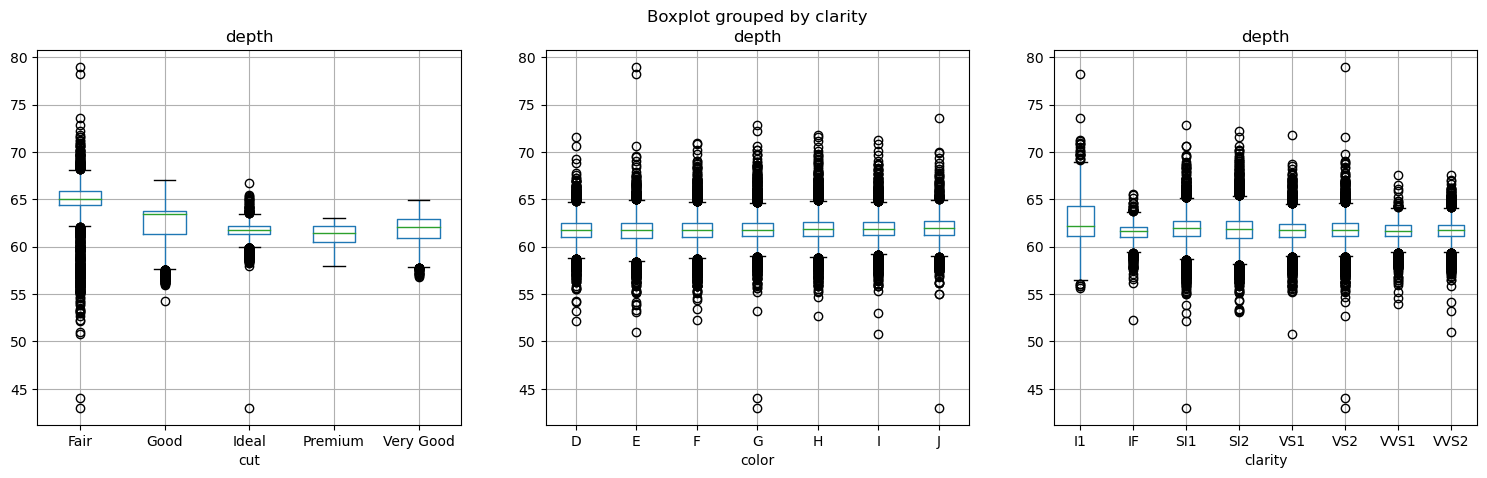

In [ ]:
#comparision between categorical and continous variables
CategoricalColsList=['cut', 'color', 'clarity']


import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "depth"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Diamond_df.boxplot(column='depth', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#### Test for correlation of other variables with our target variables to figure out the best predictors

In [ ]:
#ANOVA tests:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)


In [ ]:
#Or use the function to check all the categorical variables for their correlations with price
CategoricalPredictorList=['color', 'clarity', 'cut']
FunctionAnova(inpData=Diamond_df,
              TargetVariable='price',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

color is correlated with price | P-Value: 0.0
clarity is correlated with price | P-Value: 1.688432138357e-312
cut is correlated with price | P-Value: 1.761524985759165e-147


['color', 'clarity', 'cut']

###### Depth and Table have a low correletion so they shall not be considered in our model
###### From the tests above we  are choosing (Carat,x,y,z,Cut,Clarity,Color)

## Feature Selection for machine learning ##

In [ ]:
Clarity_Df = Diamond_df['clarity'].unique()

In [ ]:
Cut_Df = Diamond_df['cut'].unique()

In [ ]:
Color_Df = Diamond_df['color'].unique()

In [ ]:
SelectedColumns=['carat', 'cut', 'clarity', 'color', 'x', 'y', 'z']

# Selecting final columns
DataForML= Diamond_df[SelectedColumns]
DataForML.head()

,carat,cut,clarity,color,x,y,z
0,0.23,Ideal,SI2,E,3.95,3.98,2.43
1,0.21,Premium,SI1,E,3.89,3.84,2.31
2,0.23,Good,VS1,E,4.05,4.07,2.31
3,0.29,Premium,VS2,I,4.20,4.23,2.63
4,0.31,Good,SI2,J,4.34,4.35,2.75


In [ ]:
color_mapping = {'E': 7, 'I': 6, 'J': 5, 'H': 4, 'D': 3, 'F': 2, 'G': 1}
clarity_mapping = {'IF': 8, 'VVS2': 7, 'I1': 6, 'VVS1': 5, 'VS2': 4, 'VS1': 3, 'SI1': 2, 'SI2': 1}
cut_mapping = {'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}
DataForML['color'] = DataForML['color'].map(color_mapping)
DataForML['clarity'] = DataForML['clarity'].map(clarity_mapping)
DataForML['cut'] = DataForML['cut'].map(cut_mapping)
DataForML.head()

,carat,cut,clarity,color,x,y,z
0,0.23,1,1,7,3.95,3.98,2.43
1,0.21,2,2,7,3.89,3.84,2.31
2,0.23,3,3,7,4.05,4.07,2.31
3,0.29,2,4,6,4.20,4.23,2.63
4,0.31,3,1,5,4.34,4.35,2.75


In [ ]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [ ]:
DataForML.columns

Index(['carat', 'cut', 'clarity', 'color', 'x', 'y', 'z'], dtype='object')

In [ ]:
import sklearn.model_selection

In [ ]:
from sklearn.model_selection import train_test_split

# Select the predictors and target variable
predictors = ['carat', 'x', 'y', 'z', 'color', 'clarity', 'cut']
targetvariable = 'price'

X=DataForML[predictors].values
Y=Diamond_df[targetvariable].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(DataForML[predictors], Diamond_df[targetvariable], test_size=0.2, random_state=45)

Since our target variable is continuous, we are going to choose a regression model for our predictions

##### LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
predict_lr=lr.predict(X_test)
mse=mean_squared_error(Y_test,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1387.9664295892348

###### RIDGE MODEL

In [ ]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(X_train,Y_train)
predict_r=r.predict(X_test)
mse=mean_squared_error(Y_test,predict_r)
r_score=np.sqrt(mse)
r_score

1387.9702641393062

###### GRADIENT BOOSTING REGRESSOR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
p=gbr.predict(X_test)
gb_score=mean_squared_error(Y_test,p)
gb_score=np.sqrt(gb_score)
gb_score

765.6483812458167

Of the three Regressor models tested (Linear Regression, Ridge & Gradient Boosting Regressor), GradientBoostingRegressor gives the lowest Root Mean Square Error. hence the reason for choosing it as our predictor model

#### Reading the diamond Test Data

In [ ]:
test_df = pd.read_excel('DiamondPricesData.xlsx', sheet_name='DiamondTestData')

In [ ]:
test_df.head()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,NaN,0.23,Fair,E,VVS2,61.5,55,3.79,3.98,2.43
1,NaN,0.21,Good,E,VVS2,59.8,61,3.83,3.84,2.31
2,NaN,0.23,Good,E,VVS1,56.9,65,3.85,4.07,2.31
3,NaN,0.29,Good,I,VS2,62.4,58,3.87,4.23,2.63
4,NaN,0.31,Good,J,VS2,63.3,58,3.88,4.35,2.75


In [ ]:
test_df.isnull().sum()

price      48
carat       0
cut         0
color       1
clarity     0
depth       2
table       0
x           0
y           0
z           0
dtype: int64

In [ ]:
test_df['color'].fillna(test_df['color'].mode(), inplace=True)

In [ ]:
test_df = test_df.drop(columns=['price'])
test_df = test_df.drop(columns=['depth'])

In [ ]:
test_df = test_df.drop(columns=['table'])

In [ ]:
test_df.head()

,carat,cut,color,clarity,x,y,z
0,0.23,Fair,E,VVS2,3.79,3.98,2.43
1,0.21,Good,E,VVS2,3.83,3.84,2.31
2,0.23,Good,E,VVS1,3.85,4.07,2.31
3,0.29,Good,I,VS2,3.87,4.23,2.63
4,0.31,Good,J,VS2,3.88,4.35,2.75


In [ ]:
color_mapping = {'E': 7, 'I': 6, 'J': 5, 'H': 4, 'D': 3, 'F': 2, 'G': 1}
clarity_mapping = {'IF': 8, 'VVS2': 7, 'I1': 6, 'VVS1': 5, 'VS2': 4, 'VS1': 3, 'SI1': 2, 'SI2': 1}
cut_mapping = {'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}
test_df['color'] = test_df['color'].map(color_mapping)
test_df['clarity'] = test_df['clarity'].map(clarity_mapping)
test_df['cut'] = test_df['cut'].map(cut_mapping)
test_df.head()

,carat,cut,color,clarity,x,y,z
0,0.23,5,7.0,7,3.79,3.98,2.43
1,0.21,3,7.0,7,3.83,3.84,2.31
2,0.23,3,7.0,5,3.85,4.07,2.31
3,0.29,3,6.0,4,3.87,4.23,2.63
4,0.31,3,5.0,4,3.88,4.35,2.75


In [ ]:
X_test.head()

,carat,x,y,z,color,clarity,cut
9899,1.21,6.82,6.77,4.23,6,1,2
32,0.23,3.97,4.01,2.42,7,3,4
6623,1.02,6.41,6.44,4.02,6,1,4
14309,1.38,7.14,7.10,4.40,6,1,1
12274,1.21,6.85,6.90,4.23,5,4,4


In [ ]:
new_order = ['carat', 'x', 'y', 'z', 'color', 'clarity', 'cut']

#Rearrange the columns
test_df = test_df[new_order]

In [ ]:
test_df.head()

,carat,x,y,z,color,clarity,cut
0,0.23,3.79,3.98,2.43,7.0,7,5
1,0.21,3.83,3.84,2.31,7.0,7,3
2,0.23,3.85,4.07,2.31,7.0,5,3
3,0.29,3.87,4.23,2.63,6.0,4,3
4,0.31,3.88,4.35,2.75,5.0,4,3


In [ ]:
predict=gbr.predict(X_test)
predict

array([4060.26866789,  636.74145656, 3718.24720904, ...,  513.08632727,
        876.51530318, 3433.0952206 ])

In [ ]:
test_df = test_df.dropna()
predict=gbr.predict(test_df) # Using GRADIENT BOOSTING REGRESSOR to make predictions on our test dataset
predict

array([  441.24060343,   677.4308825 ,   966.72612967,   165.61960389,
         -75.11667465,  -295.28340919,   125.51942112,   224.26569294,
         600.75000151,   212.8430459 ,   -39.1252196 ,  -259.29195414,
         638.14927635,   -39.1252196 ,   666.11567419,   873.43038136,
         415.6143056 ,    -5.18852471,    -5.18852471,    -5.18852471,
         415.6143056 ,   689.98902327,   302.08206766,   -39.1252196 ,
        -326.69736422,   -35.72519491,  -301.79582376,   374.63577091,
         296.41341328,   296.41341328,   296.41341328,   461.79049941,
         461.79049941,   374.63577091,   443.90432517,   551.93420812,
         346.66446961,   548.57275171,   264.83652979,   264.83652979,
        -155.96630052,   548.57275171,   548.57275171,   348.97025427,
         510.5038726 ,   369.39869259, -1070.02826676])

In [ ]:
predict.size

47

In [ ]:
df=pd.DataFrame({'price':predict}) # creating a pandas dataframe with predicted prices
predicted_df=pd.concat([test_df,df],axis=1) # concatenating the price dataframe with test dataframe
predicted_df

,carat,x,y,z,color,clarity,cut,price
0,0.23,3.79,3.98,2.43,7.0,7.0,5.0,441.240603
1,0.21,3.83,3.84,2.31,7.0,7.0,3.0,677.430882
2,0.23,3.85,4.07,2.31,7.0,5.0,3.0,966.726130
3,0.29,3.87,4.23,2.63,6.0,4.0,3.0,165.619604
4,0.31,3.88,4.35,2.75,5.0,4.0,3.0,-75.116675
5,0.24,3.89,3.96,2.48,5.0,4.0,3.0,-295.283409
6,0.24,3.92,3.98,2.47,6.0,4.0,3.0,125.519421
7,0.26,3.93,4.11,2.53,4.0,4.0,3.0,224.265693
8,0.22,3.94,3.78,2.49,7.0,4.0,3.0,600.750002
9,0.23,3.94,4.05,2.39,4.0,4.0,3.0,212.843046


In [ ]:
predicted_df.shape

(48, 8)

In [ ]:
color_mapping = {7:'E', 6:'I', 5:'J', 4:'H', 3:'D', 2:'F', 1:'G'}
clarity_mapping = {8:'IF', 7:'VVS2', 6:'I1', 5:'VVS1', 4:'VS2', 3:'VS1', 2:'SI1', 1:'SI2'}
cut_mapping = {1:'Ideal', 2:'Premium', 3:'Good', 4:'Very Good', 5:'Fair'}
predicted_df['color'] = predicted_df['color'].map(color_mapping)
predicted_df['clarity'] = predicted_df['clarity'].map(clarity_mapping)
predicted_df['cut'] = predicted_df['cut'].map(cut_mapping)
predicted_df

,carat,x,y,z,color,clarity,cut,price
0,0.23,3.79,3.98,2.43,E,VVS2,Fair,441.240603
1,0.21,3.83,3.84,2.31,E,VVS2,Good,677.430882
2,0.23,3.85,4.07,2.31,E,VVS1,Good,966.726130
3,0.29,3.87,4.23,2.63,I,VS2,Good,165.619604
4,0.31,3.88,4.35,2.75,J,VS2,Good,-75.116675
5,0.24,3.89,3.96,2.48,J,VS2,Good,-295.283409
6,0.24,3.92,3.98,2.47,I,VS2,Good,125.519421
7,0.26,3.93,4.11,2.53,H,VS2,Good,224.265693
8,0.22,3.94,3.78,2.49,E,VS2,Good,600.750002
9,0.23,3.94,4.05,2.39,H,VS2,Good,212.843046
